Copyright (c) 2018 [Geosoft Inc.](geosoft.com)

https://github.com/GeosoftInc/gxpy/blob/master/README.md

[BSD 2-clause License](https://github.com/GeosoftInc/gxpy/blob/master/LICENSE)

# Grid FFT

Demonstrate the application of FFT (Fast Fourier Transform) to gridded potential-field data.

## TMI Grid

We will use the Total Magnetic Intensity (TMI) data from the Black Hills Norite in South Australia.

Reference: https://doi.org/10.1071/ASEG2016ab115

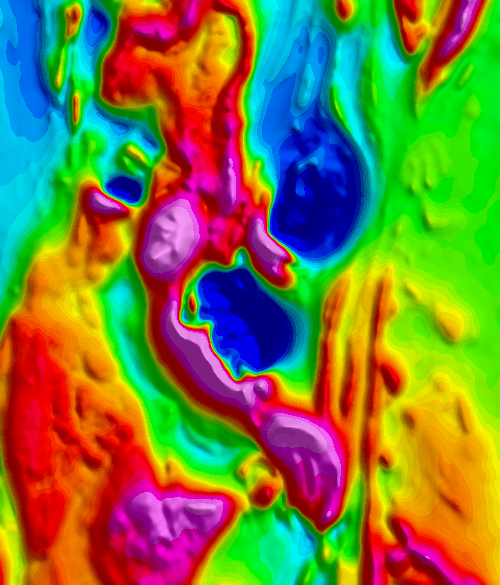

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import geosoft.gxpy.gx as gx
import geosoft.gxpy.utility as gxu
import geosoft.gxpy.grid as gxgrd
import geosoft.gxpy.grid_utility as gxgrdu

from IPython.display import Image

gxc = gx.GXpy()
gxu.check_version('9.4.0b0')

# get the sample data from github
url = 'https://github.com/GeosoftInc/gxpy/raw/master/examples/data/'
grid = 'bhn_tmi_250m.grd'
gxu.url_retrieve(url + grid)
gxu.url_retrieve(url + grid + '.gi')
gxu.url_retrieve(url + grid + '.xml')

grd = gxgrd.Grid.open(grid)
Image(grd.image_file(shade=True, pix_width=500))

## Create a GridFFT instance

To work with FFT filters, first create a GridFFT instance from the grid.  The instance will contain a reference to the source grid, an expanded and filled grid instance, and a descrete Fourier transform stored as (real, imaginary) vaule in a wavumber *(u, v)* grid.

<class GridFFT>: bhn_tmi_250m (399, 467)


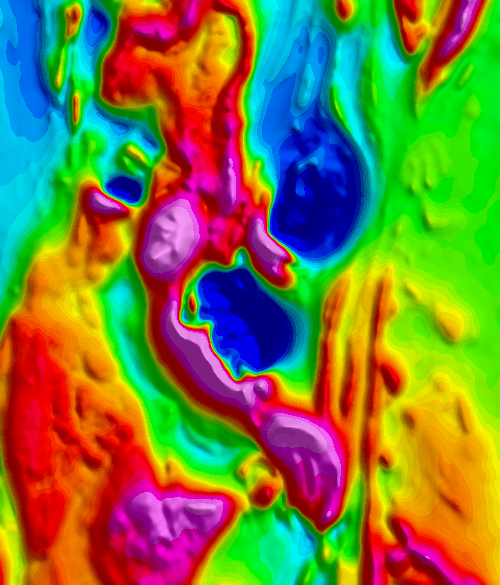

In [2]:
import geosoft.gxpy.grid_fft as gxfft
fft = gxfft.GridFFT(grd)
print(str(fft))

Image(fft.source_grid.image_file(shade=True, pix_width=500))

## Simple Filter - Vertical Derivative

Here we apply a simple vertical derivative filter and display the result.  Filters are defined by providing the 4-letter mnemonic filter name with parameters as described in the `magmap.con` control file:

https://github.com/GeosoftInc/gxc/blob/master/reference/con_files/magmap.con

The filter for a vertical derivative is 'DRVZ 1', or ('DRVZ', 1) which may be a more convenient form in a program that is determining filter parameters dynamically.

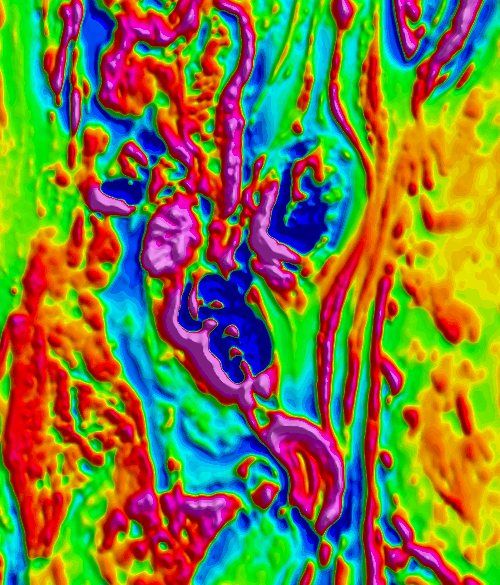

In [3]:
# apply a filter
fft.filter(['DRV1 1'])

# fft.result_grid() can be called to get a grid instance of the filtered result
Image(fft.result_grid().image_file(shade=True, pix_width=500))

Here we apply two filters - an upward continuation and a vertical derivative.  In this case we will use the tuple form to describe an upward-continuation of 250 m:

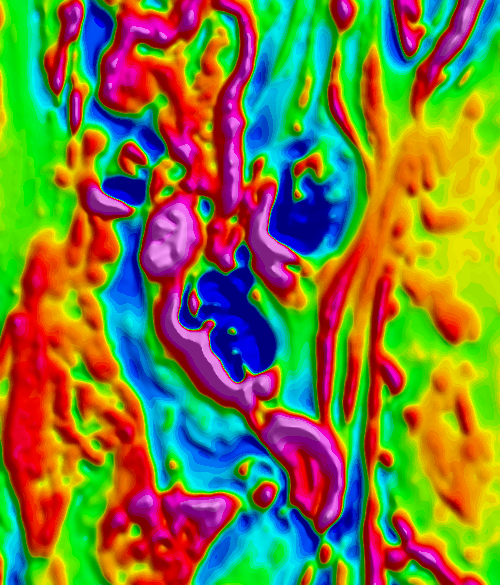

In [4]:
# apply a filter
fft.filter([('CNUP', 250), 'DRV1 1'])

# fft.result_grid() can be called to get a grid instance of the filtered result
Image(fft.result_grid().image_file(shade=True, pix_width=500))

Filters can also be applied to the currently filtered state by specifying the source transform with the `trn=gxfft.FILTERED` parameter:

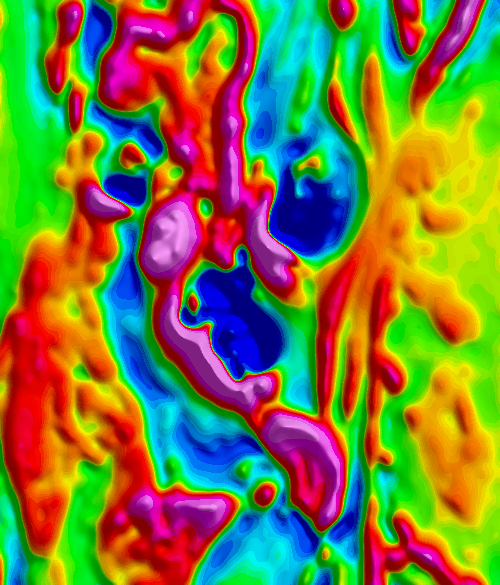

In [5]:
# vertical derivative then upward continuation
fft.filter(['DRV1 1'])
fft.filter(['CNUP 500'], trn=gxfft.FILTERED)

# fft.result_grid() can be called to get a grid instance of the filtered result
Image(fft.result_grid().image_file(shade=True, pix_width=500))

## Power Spectrum

The power spectrum can be viewed either in radially averaged form, or as a grid of the transform in *(u, v)* wavenumber space. Here we will show the original spectrum and the filterd spectum for comparison using matplotlig.

average spectral density (source, filtered): (23.3624, 7.91991)


<IPython.core.display.Javascript object>


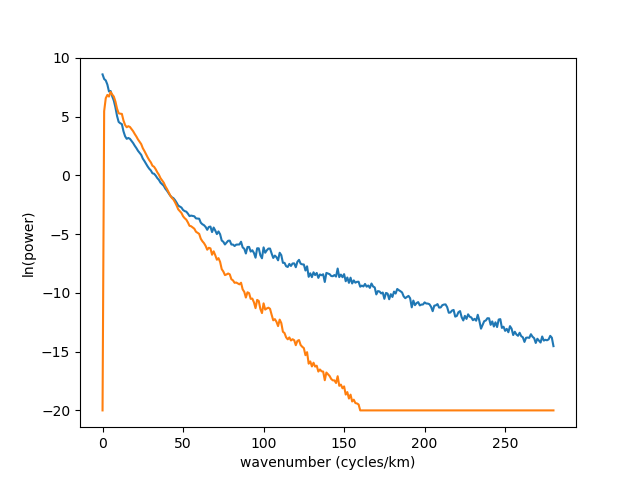

In [6]:
# this returs a numpy array shaped (n, 5), where each element contains the
# wavenumber, number_samples, log(average_power), depth_3 and depth_5)
source_spectrum = fft.radially_averaged_spectrum()
filter_spectrum = fft.radially_averaged_spectrum(trn=gxfft.FILTERED)

# the power is relative to the average density
print('average spectral density (source, filtered): ({}, {})'.
      format(fft.log_average_spectral_density(), fft.log_average_spectral_density(trn=gxfft.FILTERED)))

plt.plot(source_spectrum[:, gxfft.LOG_POWER])
plt.plot(filter_spectrum[:, gxfft.LOG_POWER])
plt.ylabel('ln(power)')
plt.xlabel('wavenumber (cycles/km)')
plt.show()

FFT power spectrum as a grid image. A power spectrum grid axis show wavenumbet *u* in the x direction and wavenumber *v* in the y direction. Wavenumbers in the grid are in cycles/grid_distance_unit, and the amplitude os the log of the power at each *(u, v)* location.  The spectrum is symetric across the *v* axis and only the *+u* part appears

Log-power spectrum (1.785714285714286e-05, 1.785714285714286e-05)


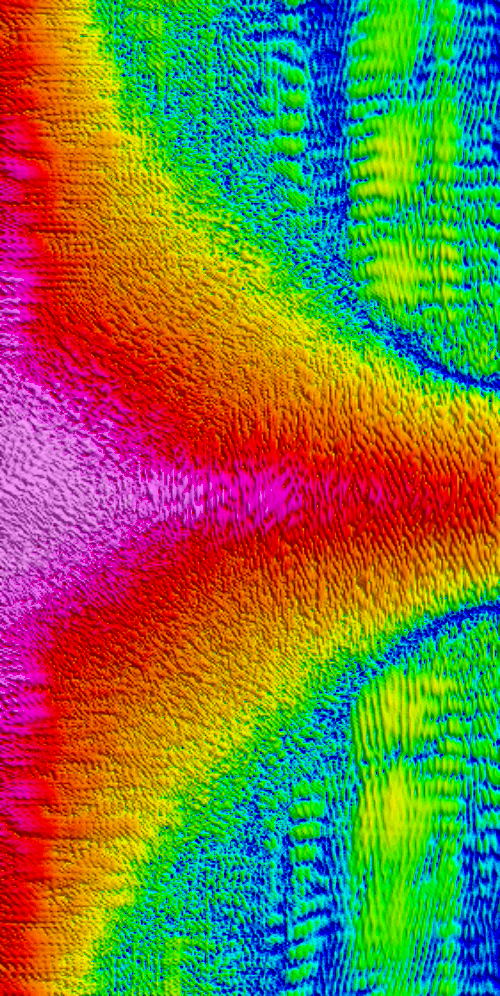

In [7]:
print('Log-power spectrum ({}, {})'.format(fft.du, fft.dv))
Image(fft.spectrum_grid().image_file(shade=True, pix_width=500))

To see the filtered specturm, specity `trn=gxfft.FILTERED`:

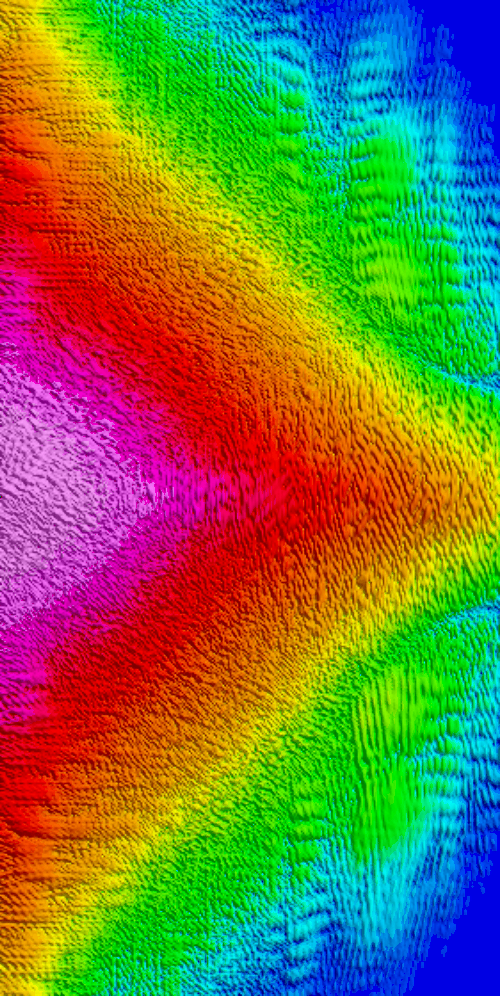

In [8]:
Image(fft.spectrum_grid(trn=gxfft.FILTERED).image_file(shade=True, pix_width=500))